# Testing Environment

In [1]:
# libraries
import numpy as np

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

### Data Visualization - One Plot

In [2]:
# dummy data of 10 values
x = np.arange(10)
y = np.random.randint(10, size=10)

print("x values: ", x)
print("y values: ", y)

x values:  [0 1 2 3 4 5 6 7 8 9]
y values:  [2 5 2 7 2 7 8 1 9 4]


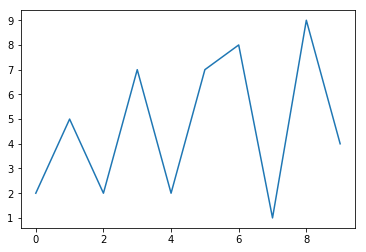

In [3]:
plt.plot(x, y) # consider default settings for plot
plt.show()

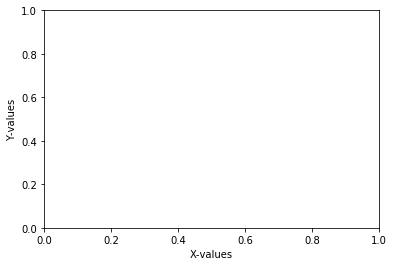

In [4]:
plt.xlabel('X-values') # update default settings
plt.ylabel('Y-values')
plt.show() # but nothing is available

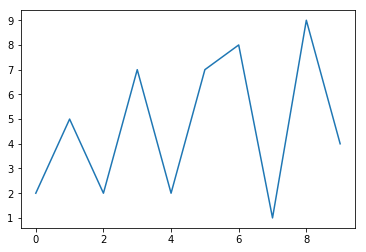

In [5]:
plt.plot(x, y) # let's try again
plt.show()

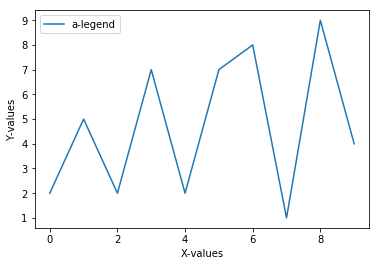

In [6]:
plt.plot(x, y) # consider default settings for plot
plt.xlabel('X-values') # update default settings
plt.ylabel('Y-values')
plt.legend(['a-legend'])
plt.show()

In [7]:
dir(plt) # what else can be done

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_autogen_docstring',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 '_string_to_bool',
 'acorr',
 'angle_spec

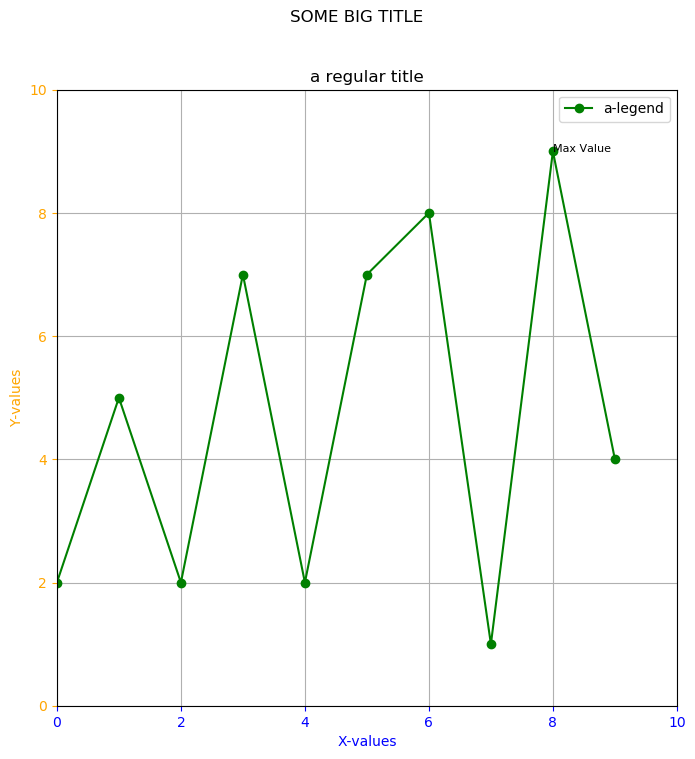

In [8]:
# apply a more advanced settings
plt.style.use('default')
plt.figure(figsize=(8, 8))
plt.plot(x, y, '-o', color='g')
plt.text(x[y.argmax()], y[y.argmax()], 'Max Value', fontsize=8)
plt.xlabel('X-values', color='blue') 
plt.ylabel('Y-values', color='orange')
plt.legend(['a-legend'])
plt.suptitle('SOME BIG TITLE')
plt.title('a regular title')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.tick_params(axis='x', colors='blue')
plt.tick_params(axis='y', colors='orange')
plt.grid()
plt.show()
plt.close()

In [9]:
from core import create_patches
import imageio as img

class Agent():
    pass

habitats = create_patches()
agents = []

for i in range(10):
    ag = Agent()
    ag.x, ag.y = np.random.rand(2)
    ag.type = 's' if i < 5 else 'l'
    agents.append(ag)
    
habitats
agents

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


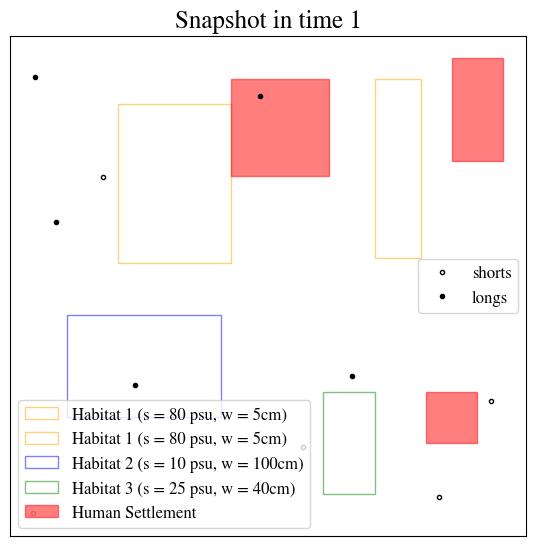

In [12]:
import copy as cp
%load_ext autoreload

plt.cla()
fig = plt.figure(1)
ax  = fig.add_subplot(111)

for h in habitats:
    ax.add_patch( cp.copy(h.artist) ) # add artists (patches) to display rectangles

# distribute agents according their types
shorts = [ag for ag in agents if ag.type == 's']
longs = [ag for ag in agents if ag.type == 'l']

# plot agents' positions
leg_sh, = ax.plot(
    [ag.x for ag in shorts], 
    [ag.y for ag in shorts], 
    'o', mfc='w', mec='k', label='shorts')

leg_lg, = ax.plot(
    [ag.x for ag in longs], 
    [ag.y for ag in longs], 
    'o', mfc='k', mec='k', label='longs')

leg_a = [h.artist for h in habitats if h.type != 'human-settlement']
leg_h = [h.artist for h in habitats if h.type == 'human-settlement']
leg_a.append(leg_h[0])

# additional settings for the graph
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('image')
first_legend = plt.legend(loc='center right', handles=[leg_sh, leg_lg])
plt.gca().add_artist(first_legend)
plt.legend(loc='lower left', handles=leg_a)
plt.title('Snapshot in time 1') # Title the graph
# plt.savefig('plot.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


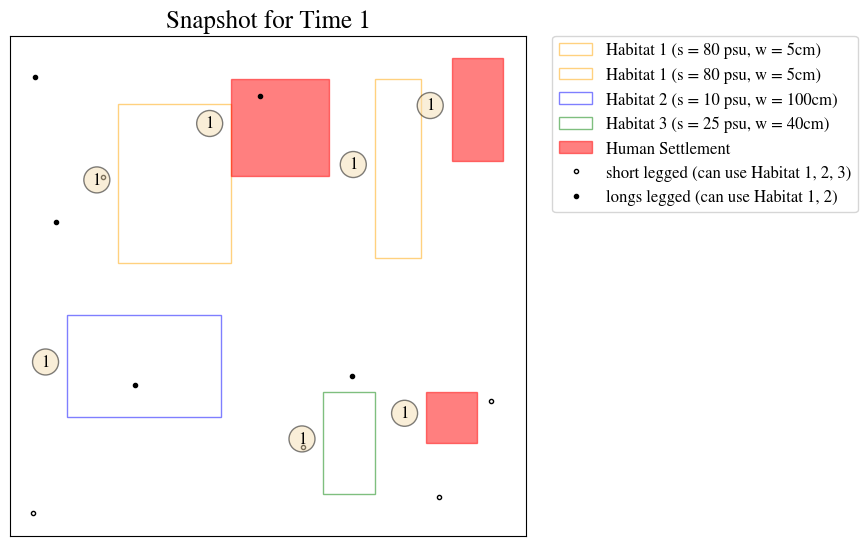

In [18]:
import copy as cp
%load_ext autoreload
%reload_ext autoreload

plt.cla()
fig = plt.figure(1)
ax  = fig.add_subplot(111)

for h in habitats:
    A, B, C, D, _ = h.verts # ignore last vertex
    cx = A[0] - 0.05
    cy = (A[1] + B[1]) / 2 # height side
    if h.type != 'human':
        ax.text(cx, cy, '1', bbox=dict(boxstyle='circle', facecolor='wheat', alpha=0.5))
    ax.add_patch( cp.copy(h.artist) ) # add artists (patches) to display rectangles

# distribute agents according their types
shorts = [ag for ag in agents if ag.type == 's']
longs = [ag for ag in agents if ag.type == 'l']

# plot agents' positions
leg_sh, = ax.plot(
    [ag.x for ag in shorts], 
    [ag.y for ag in shorts], 
    'o', mfc='w', mec='k', label='short legged (can use Habitat 1, 2, 3)')

leg_lg, = ax.plot(
    [ag.x for ag in longs], 
    [ag.y for ag in longs], 
    'o', mfc='k', mec='k', label='longs legged (can use Habitat 1, 2)')

leg_a = [h.artist for h in habitats if h.type != 'human-settlement']
leg_h = [h.artist for h in habitats if h.type == 'human-settlement']
leg_a.extend([leg_h[0], leg_sh, leg_lg])

# additional settings for the graph
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('image')
plt.legend(handles=leg_a, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Snapshot for Time 1')
# plt.savefig('plot.png', bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

/home/rflorent/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


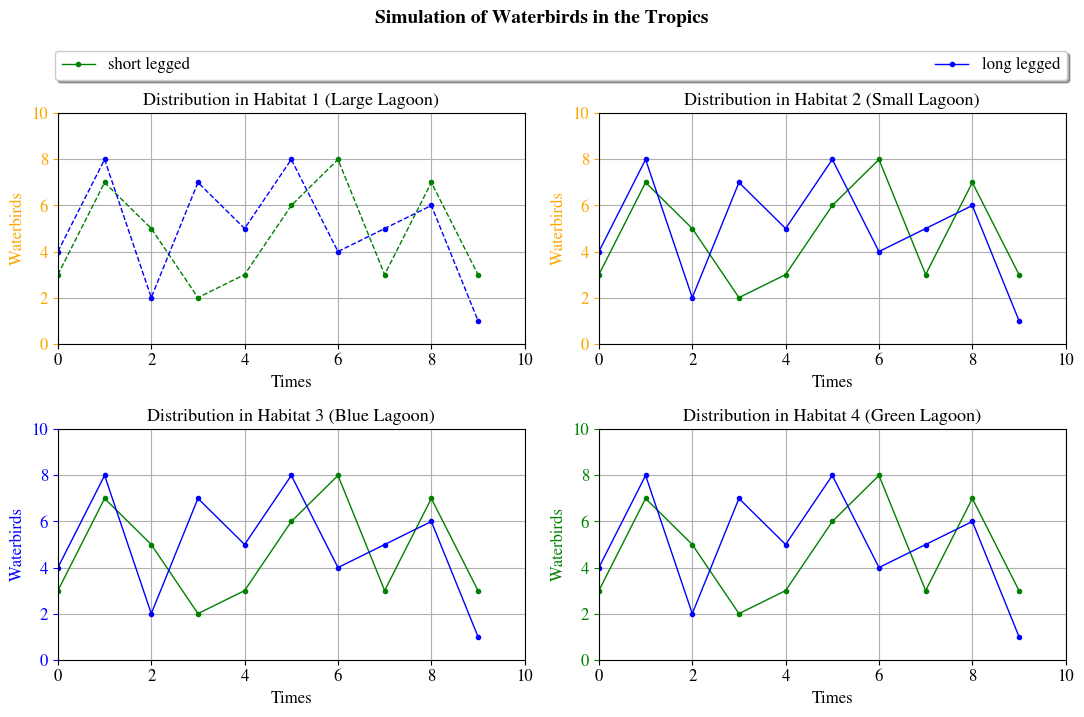

In [11]:
t = np.arange(10)
xlim = [0, 10]
ylim = [0, 10]

arr = np.random.randint(10, size=(2, 10))

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 3

fig2 = plt.figure(2, figsize=(11, 6.5))

panel_A = fig2.add_subplot(2,2,1)
panel_A.plot(t, arr[0], '--o', color='g', label='short legged')
panel_A.plot(t, arr[1], '--o', color='b', label='long legged')
panel_A.set_xlim(xlim)
panel_A.set_ylim(ylim)
panel_A.tick_params(axis='y', colors='orange')
panel_A.set_xlabel('Times')
panel_A.set_ylabel('Waterbirds', color='orange')
panel_A.set_title('Distribution in Habitat 1 (Large Lagoon)', fontsize=13)
                        
panel_B = fig2.add_subplot(2,2,2)
panel_B.plot(t, arr[0],'-o', color='g', label='short legged')
panel_B.plot(t, arr[1],'-o', color='b', label='long legged')
panel_B.set_xlim(xlim)
panel_B.set_ylim(ylim)
panel_B.tick_params(axis='y', colors='orange')
panel_B.set_xlabel('Times')
panel_B.set_ylabel('Waterbirds', color='orange')
panel_B.set_title('Distribution in Habitat 2 (Small Lagoon)', fontsize=13)

panel_C = fig2.add_subplot(2,2,3)
panel_C.plot(t, arr[0],'-o', color='g', label='short legged')
panel_C.plot(t, arr[1],'-o', color='b', label='long legged')
panel_C.set_xlim(xlim)
panel_C.set_ylim(ylim)
panel_C.tick_params(axis='y', colors='blue')
panel_C.set_xlabel('Times')
panel_C.set_ylabel('Waterbirds', color='blue')
panel_C.set_title('Distribution in Habitat 3 (Blue Lagoon)', fontsize=13)

panel_D = fig2.add_subplot(2,2,4)
legend_sh, = panel_D.plot(t, arr[0],'-o', color='g', label='short legged')
legend_lg, = panel_D.plot(t, arr[1],'-o', color='b', label='long legged')
panel_D.set_xlim(xlim)
panel_D.set_ylim(ylim)
panel_D.tick_params(axis='y', colors='green')
panel_D.set_xlabel('Times')
panel_D.set_ylabel('Waterbirds', color='green')
panel_D.set_title('Distribution in Habitat 4 (Green Lagoon)', fontsize=13)

fig2.legend(handles=[legend_sh, legend_lg], bbox_to_anchor=(0.05, 0.98, 0.92, .102), 
           loc='lower left', ncol=2, mode='expand', borderaxespad=0., fancybox=True, shadow=True)

fig2.set_tight_layout(True)
fig2.suptitle('Simulation of Waterbirds in the Tropics', y=1.1, fontsize=14, fontweight='bold')

plt.show()

In [19]:
print(plt.rcParams.items())

ItemsView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
       

/home/rflorent/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [31]:
import os
import yaml

def load_config(filename='config.yml'):
    # make sure the config file exists
    if not os.path.isfile(filename):
        raise IOError(f'the filename <{filename}> does not exists.')

    with open(filename, 'r') as configfile:
        config = yaml.load(configfile)
    return config

CONFIG = load_config()
print(CONFIG)

{'version': '1.0.0', 'metadata': {'profile': 'development', 'name': 've-ibm', 'description': 'Virtual Environment for Individual-Based Modeling'}, 'rootDir': '.', 'outDir': '../../', 'paths': {'sample': 'samples', 'graph': 'graphs'}, 'app': {'threshold': '1e-7', 'counter': 5, 'rain': {'divisor': 10, 'values': [20, 200, 600, 30, 0, 0]}, 'habitats': None, 'agents': [{'type': '5cm', 'quantity': 5, 'color': '#6CC2BD', 'label': '5cm-legged', 'habs': [1], 'fns': [{'penv': 'w', 'def': 'lambda x: -0.00002*x**5 + 0.0028*x**4 - 0.1551*x**3 + 4.0552*x**2 - 48.806*x + 213.64', 'args': ['x'], 'deps': None}, {'penv': 's', 'def': 'lambda s: 0.00006 * s**2 + 0.0002 * s + 0.0004', 'args': ['s'], 'deps': None}, {'penv': 'f', 'def': 'lambda f: (0.00673 * f**2) - (0.002936 * f) + 0.5', 'args': ['f'], 'deps': None}, {'penv': 'd', 'def': 'lambda d: -0.0013 * d**2 + 0.0074 * d - 0.0001', 'args': ['d'], 'deps': None}]}, {'type': '10cm', 'quantity': 4, 'color': '#5A809E', 'label': '10cm-legged', 'habs': [1], '

In [12]:
CNF_AG  = CONFIG['app']['agents']
for ag in CNF_AG:
    print(ag['type'])

5cm
10cm
30cm
60cm


In [49]:
snapshots = {
    'o-sm': {},
    'o-lg': {},
    'blue': {},
    'green': {}
}

for ag_cnf in CNF_AG:
    for k in snapshots.keys():
        snapshots[k][ag_cnf['type']] = 0

In [50]:
snapshots

{'o-sm': {'5cm': 0, '10cm': 0, '30cm': 0, '60cm': 0},
 'o-lg': {'5cm': 0, '10cm': 0, '30cm': 0, '60cm': 0},
 'blue': {'5cm': 0, '10cm': 0, '30cm': 0, '60cm': 0},
 'green': {'5cm': 0, '10cm': 0, '30cm': 0, '60cm': 0}}

In [115]:
total_agents = sum([ag_cnf['quantity'] for ag_cnf in CNF_AG])
total_agents

24

In [80]:
def_exp = CNF_AG[0]['fn']['def']
args = CNF_AG[0]['fn']['args']
fn = eval(def_exp)
kwargs = {}
for k in args:
    kwargs[k] = 0
fn(**kwargs)

213.64

In [81]:
l5 = lambda x: -0.00002*x**5 + 0.0028*x**4 - 0.1551*x**3 + 4.0552*x**2 - 48.806*x + 213.64
l5(.4)

194.75657707519997

In [24]:

def eval_fn(meta_fn, *args):
    fn_def, fn_args, fn_deps = meta_fn['def'], meta_fn['args'], meta_fn['deps']
    if isinstance(fn_deps, list):
        for dep in fn_deps: exec(dep, globals()) # execute deps if any
    fn = eval(fn_def)
    
    if not isinstance(fn_args, list) or len(fn_args) == 0: # no args required
        return fn()
    elif len(fn_args) == len(args):
        kwargs = dict(zip(fn_args, args)) # zip into keyworded args: {'k': v, ...}
        return fn(**kwargs)
    else:
        raise RuntimeError(f'Cannot evaluate this function <{fn_def}>. Check required arguments')
    

# mfn = eval_fn(CNF_AG[3]['fn'], 1)
# mfn

In [5]:
 for ag_cnf in CNF_AG:
    restricted_habs = []

    for _type in ag_cnf['habs']:
        print("agent {} habs::_type {}".format(ag_cnf['type'], _type))
#         for hab in habitats:
#             if _type == hab.type:
#                 restricted_habs.append(hab)
#                 break

agent 5cm habs::_type 1
agent 10cm habs::_type 1
agent 30cm habs::_type 1
agent 30cm habs::_type 2
agent 60cm habs::_type 1
agent 60cm habs::_type 2
agent 60cm habs::_type 3


In [26]:
fns = CNF_AG[3]['fns']
fn1 = fns[0]
eval_fn(fn1, *[4, 3])

    

64.0

In [29]:
s, d, f = 2, 3, 4
w = [1, 2]
probs = list()
for meta_fn in CNF_AG[3]['fns']:
    penv = meta_fn['penv'] # which spec: w, s, f, d
    if penv == 'w':
        res = eval_fn(meta_fn, *w)
    elif penv == 's':
        res = eval_fn(meta_fn, s)
    elif penv == 'f':
        res = eval_fn(meta_fn, f)
    else:
        res = eval_fn(meta_fn, d)
    probs.append(res)
res

4

In [30]:
def penv_switcher(name):
    switcher = {
        'w': 'water'
    }
    return switcher.get(name, 'invalid')

[1.0, 4]